In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### loading dataset

In [2]:
df  = pd.read_csv("netflix_titles.csv")

#### overview of data

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
shape = df.shape
shape

(8807, 12)

In above summary We can see that there are total 8807 rows and 12 columns present in the dataset. the summary also includes list of all columns with their data types and the number of non-null values in each column. we also have the value of rangeindex provided for the index axis.

In [8]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

##### Handling Null values

In [9]:

# Let's check if there is any Null value using isnull() method
df.isnull().values.any() 

True

In [10]:
# checking total number of null values column wise.
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# total number of null values in entire dataset.
df.isnull().sum().sum()

4307

There are total 4307 null values present in the entire dataset out of which 2634 missing points under 'director', 825 under 'cast', 831 under 'country', 10 under 'date_added', and 4 under 'rating', 3 under duration. so before diving into EDA we first need to handle all these null values.

In [12]:
# creating a copy of dataset so that will not affect our original dataset.
df1 = df.copy()

imputation is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. 

The fillna method is used to fill missing values in specific columns with specified values. 
The dropna method is used to remove rows containing any missing values.


In [13]:
# dealing will null values

# Fill missing values in specific columns with placeholders
df1['director'].fillna('No Director', inplace=True)
df1['cast'].fillna('No Cast', inplace=True)
df1['country'].fillna('Country Unavailable', inplace=True)
df1['duration'].fillna('no duration', inplace=True)
df1.dropna(subset=['date_added','rating'],inplace=True)

There are multiple ways to deal with null values but in this we simply replaced all the null values with NA. as the two columns 'date_added' and 'rating' are not going to be part of our analysis so will drop the columns.
and from above we can see that there are no more null values in the dataset.

In [14]:

df1.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

#### EDA

In [15]:
# Let's check total how many Tv shows and movies are present in the dataset.
counts = df1['type'].value_counts()

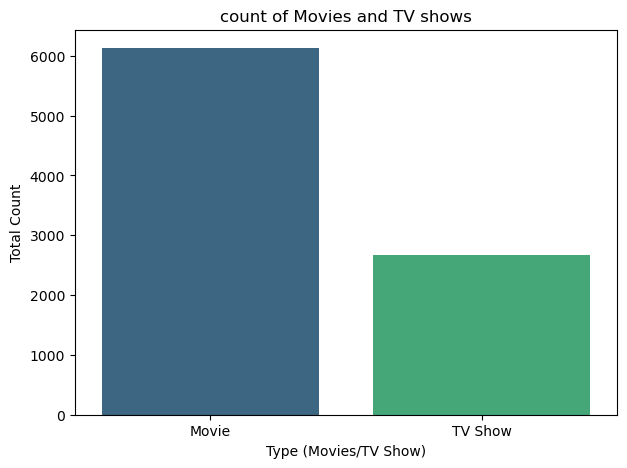

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='type', data=df1, palette='viridis')
plt.title("count of Movies and TV shows")
plt.xlabel("Type (Movies/TV Show)")
plt.ylabel("Total Count")
plt.show()

So from above visualization we can say that there are roughly 6,000+ movies and almost 2,800 shows with movies being the majority.


([<matplotlib.patches.Wedge at 0x7f1f64e7ed10>,
 [Text(0.6382372276193032, -0.8959091702180674, 'Movie'),
  Text(-0.6382372276193031, 0.8959091702180674, 'TV Show')],
 [Text(0.3481293968832563, -0.48867772920985486, '69.70%'),
  Text(-0.3481293968832562, 0.48867772920985486, '30.30%')])

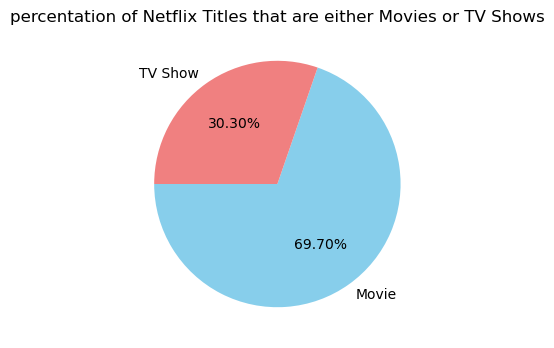

In [17]:
plt.figure(figsize=(8,4))
plt.title("percentation of Netflix Titles that are either Movies or TV Shows")
plt.pie(counts, autopct='%0.2f%%', labels=['Movie', 'TV Show'], colors=['skyblue','lightcoral'], startangle=180)


### Pie chart for Ratings

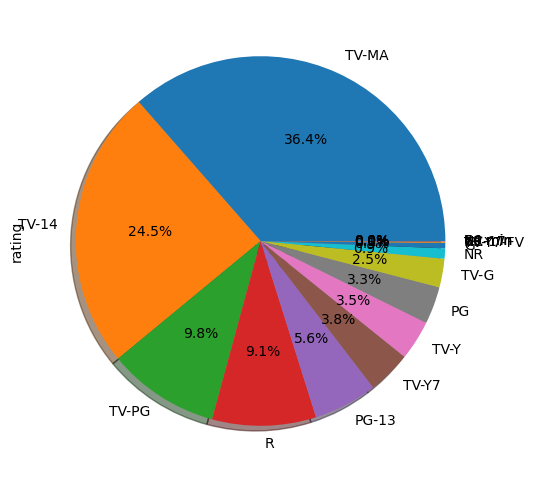

In [18]:
df1['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.show()

### Most Popular Genres on Netflix

In [19]:
filter_genre = df1['listed_in'].str.split(', ').explode().rename('genre')

In [20]:
order=filter_genre.value_counts()
order

International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

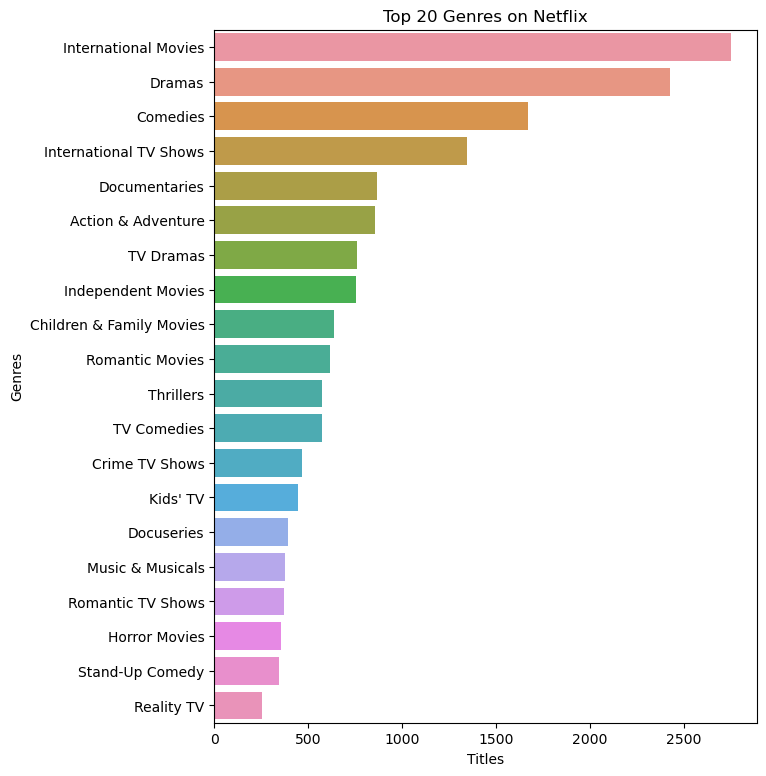

In [21]:
plt.figure(figsize=(7, 9))
sns.countplot(y=filter_genre, order=order.index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

#### Netflix content By Ratings.

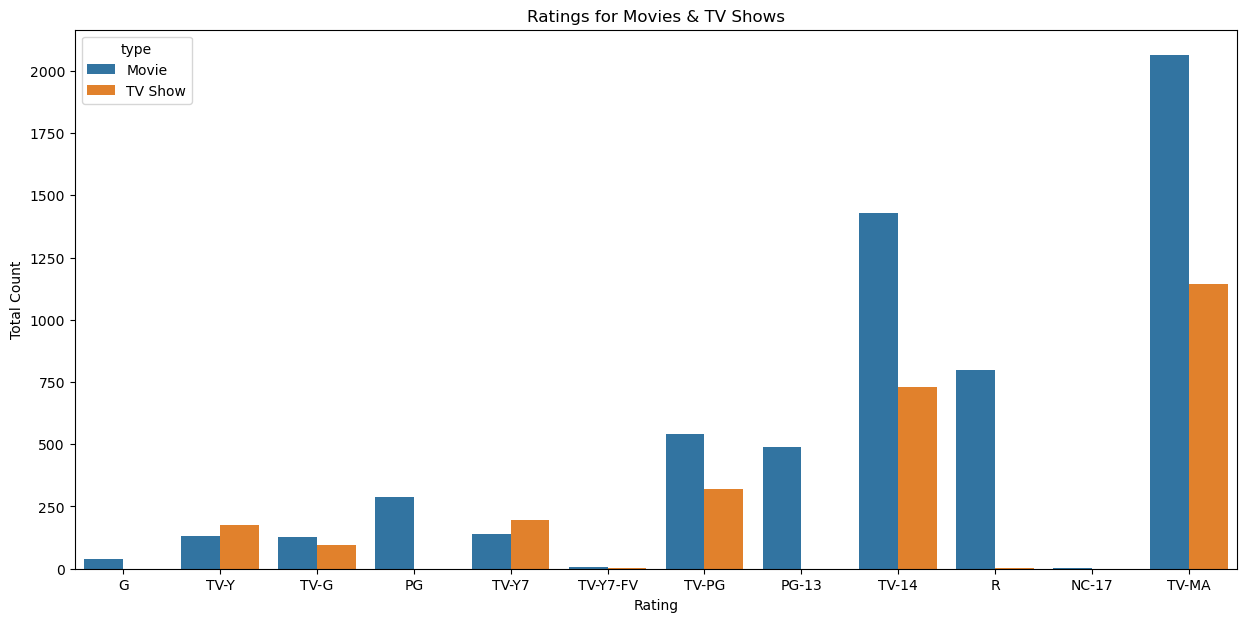

In [22]:
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

plt.figure(figsize=(15, 7))
sns.countplot(x='rating', hue='type', data=df1, order=order)
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The largest count of Netflix content is made with a “TV-14” rating. “TV-14” . But the largest count of TV shows is made with a “TV-MA” rating. 

#### Which Year has Maximum No. of released TV shows and Movies

In [23]:
tv_show = df[df['type']=='TV Show']
movies = df[df['type']=='movies']

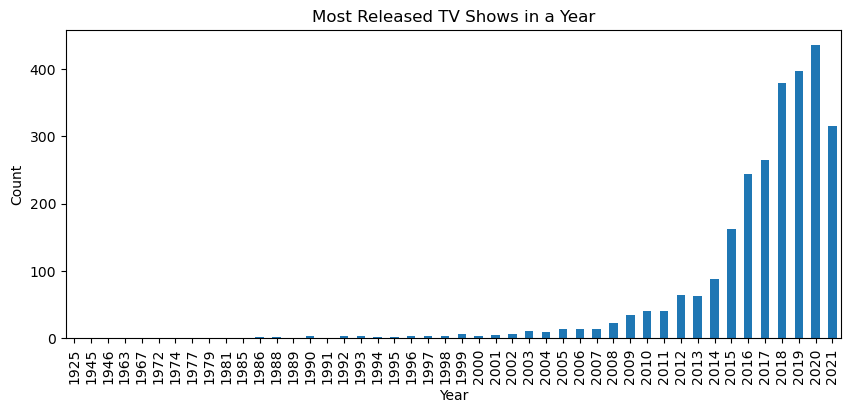

In [24]:
plt.figure(figsize=(10, 4))
tv_show['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Most Released TV Shows in a Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### country with highest No. of content release

Text(0, 0.5, 'count')

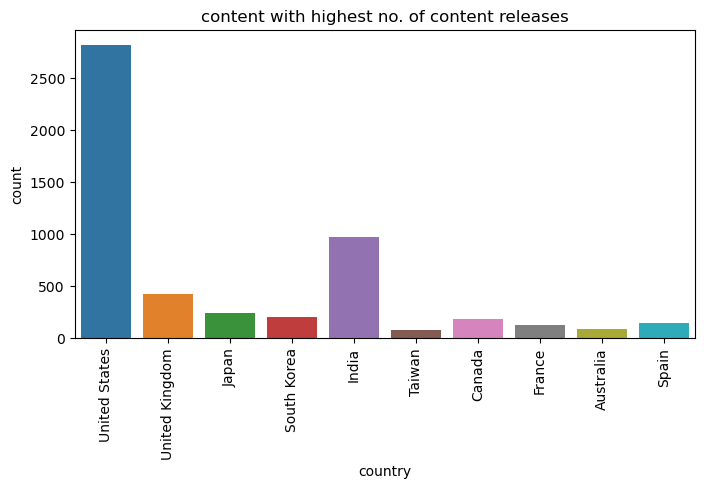

In [25]:
tv_show['country'].value_counts()
plt.figure(figsize=(8,4))
sns.countplot(x='country',data=df,order=tv_show['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("content with highest no. of content releases")
plt.xlabel("country")
plt.ylabel("count")

country with highesh no. of content released is US while lowest no. of content release is Taiwan

#### Encoding

In [26]:
df1['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [27]:
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [29]:
catcol = df1.select_dtypes(object).columns

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df1[catcol]=oe.fit_transform(df1[catcol])

In [31]:
# Select relevant features and target variable
X = df1.drop(['show_id', 'type', 'title', 'description', 'director'], axis=1)
y = df1['type']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1221
         1.0       0.99      0.99      0.99       538

    accuracy                           0.99      1759
   macro avg       0.99      0.99      0.99      1759
weighted avg       0.99      0.99      0.99      1759



##### this achieved accuracy of 99% in the Decision Tree algorithm applied to the Netflix data, it suggests that the model performed exceptionally well in making accurate predictions. 